In [39]:
import polars as pl
import pandas as pd
import numpy as np

### Импорт данных 

In [96]:
df = pl.read_csv('books_data.csv', null_values='NaN')

In [97]:
df.head()

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""


In [98]:
df.describe()

statistic,price,year,type
str,f64,f64,str
"""count""",50000.0,48749.0,"""50000"""
"""null_count""",0.0,1251.0,"""0"""
"""mean""",1003.51169,2004.470553,null
"""std""",1000.386795,11.52278,null
"""min""",0.007358,1985.0,"""book"""
"""25%""",292.38947,1994.0,null
"""50%""",697.459594,2004.0,null
"""75%""",1392.214487,2014.0,null
"""max""",9777.052347,2024.0,"""textbook"""


### Обработка пропусков

Поиск пропусков

In [99]:
df.filter(
    pl.col("year").is_null()
)

price,year,type
f64,f64,str
1014.258665,null,"""newspaper"""
678.945008,null,"""book"""
5849.487399,null,"""magazine"""
605.61386,null,"""magazine"""
593.015503,null,"""book"""
…,…,…
188.127493,null,"""magazine"""
369.470472,null,"""textbook"""
185.065901,null,"""textbook"""


Удаление пропусков

In [100]:
df[30:40,:]

price,year,type
f64,f64,str
293.278763,2001.0,"""newspaper"""
1014.258665,null,"""newspaper"""
634.730379,1999.0,"""magazine"""
1396.577859,2021.0,"""book"""
8.300632,2007.0,"""newspaper"""
903.830641,2021.0,"""book"""
250.345347,1997.0,"""newspaper"""
355.627803,1997.0,"""encyclopedia"""
3074.857296,1987.0,"""magazine"""


In [101]:
df.drop_nulls()

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""
…,…,…
1528.844126,2008.0,"""magazine"""
813.274714,2022.0,"""newspaper"""
1145.045726,1986.0,"""textbook"""


Заполнение пропущенных данных

In [102]:
df.fill_null(0)

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""
…,…,…
1528.844126,2008.0,"""magazine"""
813.274714,2022.0,"""newspaper"""
1145.045726,1986.0,"""textbook"""


In [103]:
df[30:40, :].fill_null(0)

price,year,type
f64,f64,str
293.278763,2001.0,"""newspaper"""
1014.258665,0.0,"""newspaper"""
634.730379,1999.0,"""magazine"""
1396.577859,2021.0,"""book"""
8.300632,2007.0,"""newspaper"""
903.830641,2021.0,"""book"""
250.345347,1997.0,"""newspaper"""
355.627803,1997.0,"""encyclopedia"""
3074.857296,1987.0,"""magazine"""


In [105]:
df2 = df.fill_null(strategy = 'min')## strategy : ‘forward’ (предыдущее значение), ‘backward’ (следующее значение), ‘min’, 
## ‘max’, ‘mean’, ‘zero’ (ноль), ‘one’ (единица).
df2[30:40, :]

price,year,type
f64,f64,str
293.278763,2001.0,"""newspaper"""
1014.258665,1985.0,"""newspaper"""
634.730379,1999.0,"""magazine"""
1396.577859,2021.0,"""book"""
8.300632,2007.0,"""newspaper"""
903.830641,2021.0,"""book"""
250.345347,1997.0,"""newspaper"""
355.627803,1997.0,"""encyclopedia"""
3074.857296,1987.0,"""magazine"""


Прямое и обратное заполнение

In [106]:
df2 = df.with_columns(pl.col('year').forward_fill()) #backward_fill

In [107]:
df2[30:40, :]

price,year,type
f64,f64,str
293.278763,2001.0,"""newspaper"""
1014.258665,2001.0,"""newspaper"""
634.730379,1999.0,"""magazine"""
1396.577859,2021.0,"""book"""
8.300632,2007.0,"""newspaper"""
903.830641,2021.0,"""book"""
250.345347,1997.0,"""newspaper"""
355.627803,1997.0,"""encyclopedia"""
3074.857296,1987.0,"""magazine"""


Интерполяция

In [108]:
df2 = df.interpolate()

In [109]:
df2[30:40, :]

price,year,type
f64,f64,str
293.278763,2001.0,"""newspaper"""
1014.258665,2000.0,"""newspaper"""
634.730379,1999.0,"""magazine"""
1396.577859,2021.0,"""book"""
8.300632,2007.0,"""newspaper"""
903.830641,2021.0,"""book"""
250.345347,1997.0,"""newspaper"""
355.627803,1997.0,"""encyclopedia"""
3074.857296,1987.0,"""magazine"""


### Изменение типов данных. Кастинг

In [111]:
df2 = df.with_columns( 
    pl.col('year').cast(pl.Int32)  # strict=False / True 
) 
df2.head(5)

price,year,type
f64,i32,str
707.529256,2018,"""encyclopedia"""
1025.203348,1992,"""textbook"""
568.548657,1990,"""encyclopedia"""
895.109864,1995,"""newspaper"""
206.532754,1986,"""book"""


### Практическое задание 0
1. Импортируйте датасет титаник
2. Проанализируйте датасет на пропуски
3. Сохраните табличку со статистикой в отдельный датасет (describe)
4. Заполните пропуски наиболее подходящим способом
5. Поменяйте тип данных одного из integer столбцов на Int32
6. Сравните таблички со статистикой до и после проставления пропусков

### Операции агрегации
* quantile()
* mean()
* sum()
* min() и max()
* count()
* std() и var()
* median()

In [112]:
df.select([
    pl.col("price").count().alias("count"),
    pl.col("price").null_count().alias("null_count"),
    pl.col("price").mean().alias("mean"),
    pl.col("price").std().alias("std_dev"),
    pl.col("price").median().alias("median"),
    pl.col("price").min().alias("min"),
    pl.col("price").quantile(0.25).alias("25%"),
    pl.col("price").quantile(0.5).alias("50%"),
    pl.col("price").quantile(0.75).alias("75%"),
    pl.col("price").max().alias("max"),
])

count,null_count,mean,std_dev,median,min,25%,50%,75%,max
u32,u32,f64,f64,f64,f64,f64,f64,f64,f64
50000,0,1003.51169,1000.386795,697.412055,0.007358,292.38947,697.459594,1392.214487,9777.052347


### Groupby

In [114]:
df.head()

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""


Группировка по одному столбцу

In [121]:
df.group_by("type").agg(
    [
        pl.mean("price").alias("mean_price"),
        pl.median("year").alias("median_year"),
        pl.count()
    ]
)

/var/folders/t4/k1zqy_252832shmd93xtl6hr0000gn/T/ipykernel_73195/1638306806.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()


type,mean_price,median_year,count
str,f64,f64,u32
"""textbook""",999.892266,2005.0,10034
"""newspaper""",993.727707,2004.0,9966
"""encyclopedia""",1008.703284,2004.0,10028
"""book""",1000.189494,2005.0,9953
"""magazine""",1014.972812,2004.0,10019


Группировка по нескольким столбцам

In [129]:
df.head()

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""


In [133]:
df.group_by(["type", "year"]).agg([ 
    pl.count()
])

/var/folders/t4/k1zqy_252832shmd93xtl6hr0000gn/T/ipykernel_73195/570632484.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()


type,year,count
str,f64,u32
"""magazine""",1988.0,238
"""textbook""",2000.0,265
"""textbook""",1987.0,226
"""encyclopedia""",2024.0,215
"""textbook""",1986.0,237
…,…,…
"""encyclopedia""",2013.0,222
"""book""",1992.0,222
"""encyclopedia""",2008.0,258


Группировка датасета + поворот

In [125]:
df.group_by(["type", "year"]).agg([ 
    pl.count() 
]).pivot( 
    values="count", 
    index=["year"], 
    columns=['type']
)

/var/folders/t4/k1zqy_252832shmd93xtl6hr0000gn/T/ipykernel_73195/1745452403.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()
/var/folders/t4/k1zqy_252832shmd93xtl6hr0000gn/T/ipykernel_73195/1745452403.py:3: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  ]).pivot(


year,textbook,magazine,encyclopedia,newspaper,book
f64,u32,u32,u32,u32,u32
2000.0,265,258,226,246,253
2016.0,265,242,238,241,232
1990.0,230,248,225,232,244
2015.0,240,216,257,250,243
2022.0,230,231,244,214,272
…,…,…,…,…,…
2004.0,258,243,256,255,213
2003.0,274,255,232,217,236
1999.0,244,232,234,237,247


### Практическое задание 1
1. Импортируйте датасет с кредитной историей (credit_train.csv)
2. Напишите функцию, которая получает на вход столбец, а на выходе считает: среднее, медиану, 25-й и 75-й перцентили, кол-во нулевых и ненулевых значений (через  агрегирующие функции). Протестируйте функцию на колонках Current Loan Amount, Credit Score
3. Рассчитайте средний и медианный долг клиентов, а также среднюю и медианную сумму займа в зависимости от исхода кредита (Loan Status)
4. Определите, кредиты на какую цель (Purpose) имеют максимальную сумму займа

### Оконные функции

In [126]:
df

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""
…,…,…
1528.844126,2008.0,"""magazine"""
813.274714,2022.0,"""newspaper"""
1145.045726,1986.0,"""textbook"""


In [140]:
df.with_columns([
    pl.col("price").mean().over("type").alias("mean_price_by_type") #mean sum min max rank
]).head(10)

price,year,type,mean_price_by_type
f64,f64,str,f64
707.529256,2018.0,"""encyclopedia""",1008.703284
1025.203348,1992.0,"""textbook""",999.892266
568.548657,1990.0,"""encyclopedia""",1008.703284
895.109864,1995.0,"""newspaper""",993.727707
206.532754,1986.0,"""book""",1000.189494
3383.637351,1995.0,"""magazine""",1014.972812
9.753627,2011.0,"""newspaper""",993.727707
2809.215763,1994.0,"""book""",1000.189494
575.332756,1991.0,"""encyclopedia""",1008.703284


In [142]:
df.with_columns(
    pl.col("price").rolling_mean(window_size=3).alias("rolling_mean") #rolling_max rolling_min rolling_sum
)

price,year,type,rolling_mean
f64,f64,str,f64
707.529256,2018.0,"""encyclopedia""",null
1025.203348,1992.0,"""textbook""",null
568.548657,1990.0,"""encyclopedia""",767.093754
895.109864,1995.0,"""newspaper""",829.620623
206.532754,1986.0,"""book""",556.730425
…,…,…,…
1528.844126,2008.0,"""magazine""",1711.35468
813.274714,2022.0,"""newspaper""",1506.799631
1145.045726,1986.0,"""textbook""",1162.388189


In [145]:
df.with_columns(
    pl.col("price").rolling_mean(window_size=3).over("type").alias("rolling_mean")
)

price,year,type,rolling_mean
f64,f64,str,f64
707.529256,2018.0,"""encyclopedia""",null
1025.203348,1992.0,"""textbook""",null
568.548657,1990.0,"""encyclopedia""",null
895.109864,1995.0,"""newspaper""",null
206.532754,1986.0,"""book""",null
…,…,…,…
1528.844126,2008.0,"""magazine""",1511.495886
813.274714,2022.0,"""newspaper""",932.184551
1145.045726,1986.0,"""textbook""",399.783885


### Практическое задание 2
1. Пдгорузите датасет со стоимостью книг по типам
2. Оставьте только книги типов "newspaper" и "textbook"
3. Упорядочьте книги по году выхода
4. Найдите книгу с максимальной ценой за текущий год при текущем типе
5. Определите скользящую сумму c окном равным 10-ти

In [ ]:
df.sort(['year', 'price'], descending=True)

### Уникальные значения

In [150]:
df.select(
    pl.col("year").n_unique().alias("unique"),
    pl.approx_n_unique("year").alias("unique_approx")
)


unique,unique_approx
u32,u32
41,41


### Сложная фильтрация

In [151]:
df.head()

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""


In [153]:
df.filter(
    (pl.col("price") > 500) & 
    (pl.col("type") == "textbook")
)

price,year,type
f64,f64,str
1025.203348,1992.0,"""textbook"""
735.857274,1992.0,"""textbook"""
3795.412485,1998.0,"""textbook"""
2494.996707,2020.0,"""textbook"""
884.278757,2004.0,"""textbook"""
…,…,…
574.49876,2019.0,"""textbook"""
1491.756446,2011.0,"""textbook"""
917.92409,1993.0,"""textbook"""


In [154]:
df.filter(~(pl.col("type") == "textbook"))

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
206.532754,1986.0,"""book"""
3383.637351,1995.0,"""magazine"""
…,…,…
2178.280054,2003.0,"""encyclopedia"""
1528.844126,2008.0,"""magazine"""
813.274714,2022.0,"""newspaper"""


Использование функций для фильтрации

In [157]:
def is_adult(age): 
    return age >= 500

In [158]:
df.filter(is_adult(pl.col("price")))

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
1025.203348,1992.0,"""textbook"""
568.548657,1990.0,"""encyclopedia"""
895.109864,1995.0,"""newspaper"""
3383.637351,1995.0,"""magazine"""
…,…,…
1426.939859,2019.0,"""newspaper"""
2178.280054,2003.0,"""encyclopedia"""
1528.844126,2008.0,"""magazine"""


Цепочка фильтров

In [160]:
df.filter(
    is_adult(pl.col("price"))
).filter(pl.col('year') > 1995)

price,year,type
f64,f64,str
707.529256,2018.0,"""encyclopedia"""
541.135894,2009.0,"""magazine"""
899.770155,2017.0,"""book"""
1073.700662,2023.0,"""encyclopedia"""
1884.250052,2021.0,"""encyclopedia"""
…,…,…
556.339079,2011.0,"""newspaper"""
1426.939859,2019.0,"""newspaper"""
2178.280054,2003.0,"""encyclopedia"""


### Условия

In [162]:
df.select( 
    pl.col("year"), 
    pl.when(pl.col("year") > 2014) 
        .then(pl.lit(True)) 
        .otherwise(pl.lit(False)) 
        .alias("conditional"),
)

year,conditional
f64,bool
2018.0,true
1992.0,false
1990.0,false
1995.0,false
1986.0,false
…,…
2008.0,false
2022.0,true
1986.0,false


### Практическое задание 3
1. Подгрузите датасет с кредитной историей
2. Составьте цепочку фильтров. Сначала заберите все кредиты, которые относятся к классу "Short term", затесм оставьте внутри них только тех клиентов, чей кредитный рейтинг более 700. Сосчитайте кол-во строк в данном датасете
3. Подгрузите датасет заного. Создайте булевую колонку основываясь на Purpose. Создайте условие, по которому значение true будет проставлено для тех клиентов, которые взяли кредит под "Home Improvements" с ежемесячным долгом в более чем 8000 долларов
4. Сосчитайте, сколько всего клиентов из п.3 присутствует в данных

### Разбор ДЗ№7

1. Совмещение двух графиков
Изобразите на одной системе координат графики функций y=sin(x) и y=log(x+1). Используйте две оси Y: одну для первого графика, и вторую для другого.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.log(x + 1)

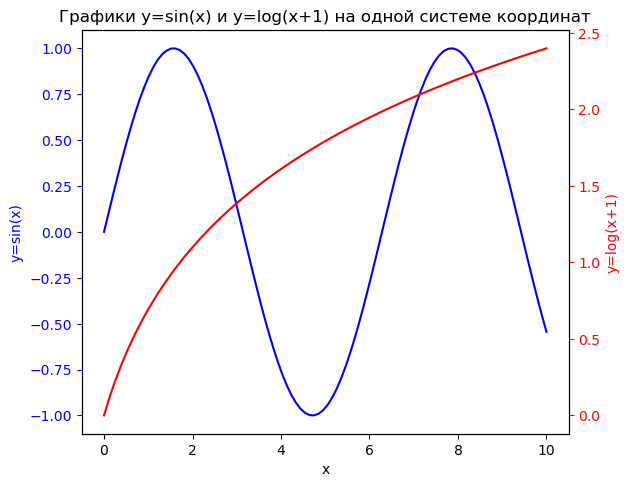

In [17]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'b-', label='y=sin(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('y=sin(x)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-', label='y=log(x+1)')
ax2.set_ylabel('y=log(x+1)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Графики y=sin(x) и y=log(x+1) на одной системе координат')
plt.show()

2. В датафрейме ниже представлены результаты соревнований: для каждого игрока указано  набранное количество очков в нескольких попытках.
data = {

    'Name': ['Анна', 'Антон', 'Мария', 'Макс', 'Макс', 'Алекс', 'Антон', 'Мария', 'Макс', 'Алекс', 'Антон', 'Анна'],

     'Points': [145, 2524, 343, 4212, 5212, 6421, 745, 842, 524, 3224, 212, 1214]      

}

Создайте из этих данных датафрейм. Сгруппируйте данные по имени игроков. Методом plot() для датафреймов постройте график минимальных, максимальных и средних очков каждого игрока на одной системе координат.

In [18]:
data = {
    'Name': ['Анна', 'Антон', 'Мария', 'Макс', 'Макс', 'Алекс', 'Антон', 'Мария', 'Макс', 'Алекс', 'Антон', 'Анна'],
    'Points': [145, 2524, 343, 4212, 5212, 6421, 745, 842, 524, 3224, 212, 1214]
}

df = pd.DataFrame(data)
df

,Name,Points
0,Анна,145
1,Антон,2524
2,Мария,343
3,Макс,4212
4,Макс,5212
5,Алекс,6421
6,Антон,745
7,Мария,842
8,Макс,524
9,Алекс,3224


In [19]:
grouped = df.groupby('Name').agg(['min', 'max', 'mean'])
grouped

Points                   
         min   max         mean
Name                           
Алекс   3224  6421  4822.500000
Анна     145  1214   679.500000
Антон    212  2524  1160.333333
Макс     524  5212  3316.000000
Мария    343   842   592.500000

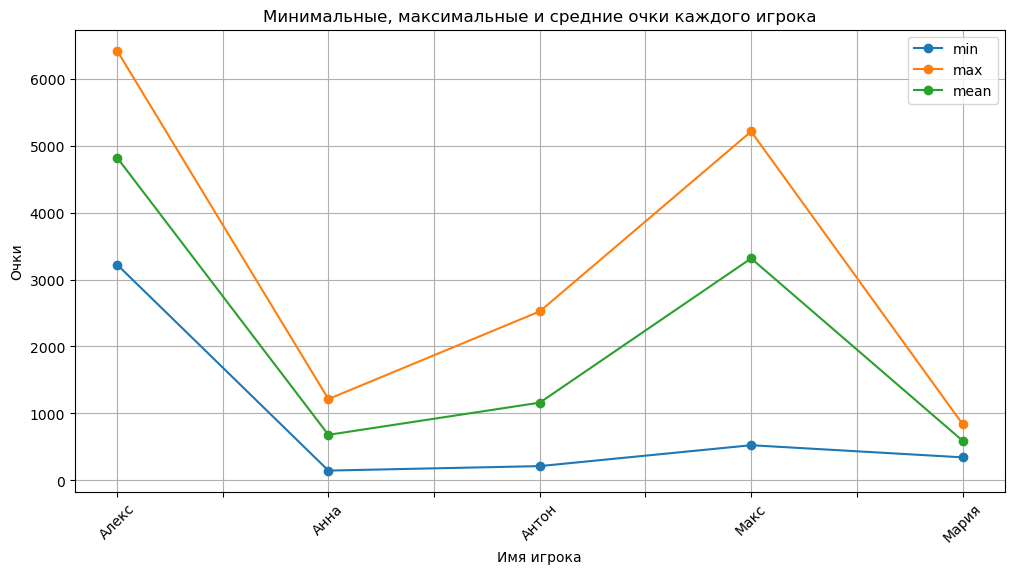

In [23]:
ax = grouped.plot(kind='line', y='Points', marker='o', figsize=(12, 6))
ax.set_xlabel('Имя игрока')
ax.set_ylabel('Очки')
ax.set_title('Минимальные, максимальные и средние очки каждого игрока')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Разбор ДЗ№8

1. barplot
Импортируйте seaborn и скачате датасет fmri. Этот набор данных содержит данные функциональной магнитно-резонансного томографии (fMRI) из эксперимента, в котором испытуемые выполняли задания на восприятие языка. Отобразите первые 5 строчек датафрейма. Визуализируйте эффект типа события. Для этого постройте barplot, отображающий среднее значение display для каждого события в момент времени timepoint=5. Не забудьте назвать график.

In [26]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [27]:
fmri = fmri[
    fmri['timepoint'] == 5]
fmri.head()

,subject,timepoint,event,region,signal
169,s12,5,stim,parietal,0.248138
184,s13,5,stim,parietal,0.252627
185,s6,5,stim,parietal,0.239175
186,s11,5,stim,parietal,0.194215
187,s10,5,stim,parietal,0.253871


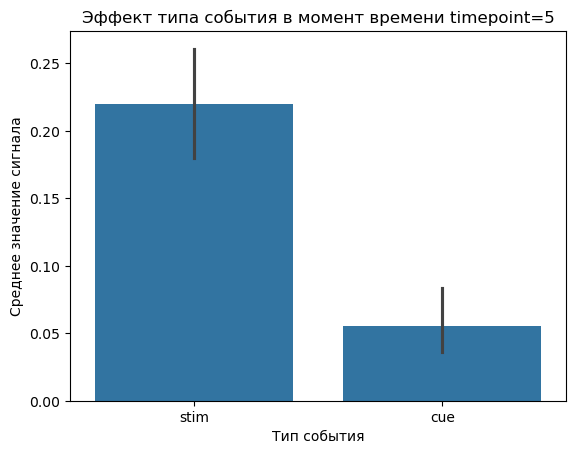

In [28]:
sns.barplot(x="event", y="signal", data=fmri)
plt.title('Эффект типа события в момент времени timepoint=5')
plt.xlabel('Тип события')
plt.ylabel('Среднее значение сигнала')
plt.show()

2. Изучите влияние области на результаты томографии. Отобразите с помощью pointplot средний сигнал в каждый момент времени в зависимости от области снятия показателей. Не забудьте назвать график.

In [30]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


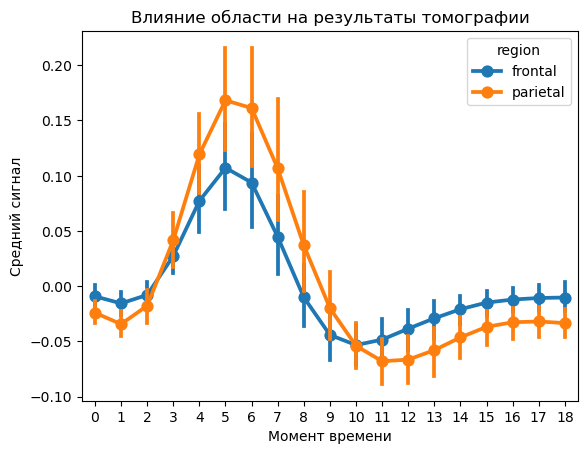

In [37]:
sns.pointplot(x='timepoint', y='signal', hue='region', data=fmri)
plt.title('Влияние области на результаты томографии')
plt.xlabel('Момент времени')
plt.ylabel('Средний сигнал')
plt.show()

3. Интерактивная визуализация с помощью FacetGrid. Используя FacetGrid, постройте отдельные lineplot для каждого субъекта, каждый график должен показывать связь между временем и сигналом. Задача со звёздочкой: подписать каждый график.

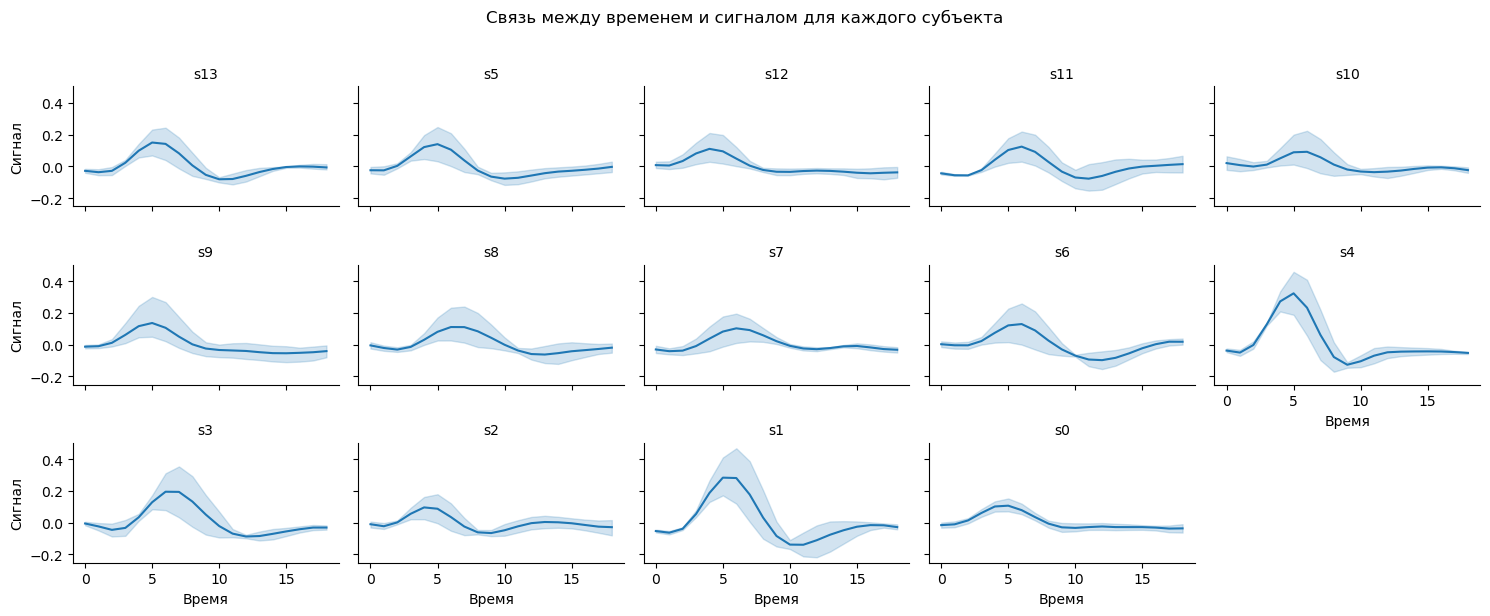

In [38]:
g = sns.FacetGrid(fmri, col='subject', col_wrap=5, height=2, aspect=1.5)
g.map(sns.lineplot, 'timepoint', 'signal')

g.set_titles('{col_name}')

g.fig.suptitle('Связь между временем и сигналом для каждого субъекта', y=1.02)
g.set_axis_labels('Время', 'Сигнал')


plt.tight_layout()
plt.show()